# TP1-Image Transformations *
** IMPRO - Master CORO SIP- Ecole Centrale Nantes **

** Diana Mateus **

Participants: (WRITE HERE YOUR NAMES AND LASTNAMES)



### Objectives

The first goal of this lab session is to understand and manipulate basic concepts of digital image processing including
- how to load and display digital images,
- how to compute and display their global properties and histograms,
- measure and analyse the effect of noise on global properties and histograms
- measure and analyse the effect of noise on image quality metrics when a reference is available

The second objective is to solve a practical problem requiring:
- the definition, implementation and visualization of a transfer function
- the combination of several transfer functions


## 0. Preparation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import skimage as sk
import utility as utill


__Read and display the images in the provided folders__

Download and unzip the images folder.  If everything goes well, the following code will list the available images. If no filename shows up, it is likely that the file path is erroneous.

In [2]:
# Change your filepath
IMDIR = "./images/"

print(os.listdir(IMDIR))


['einstein.png', 'ballons.jpg', 'peppers.png']


## 1. Working with digital images

Check the following three pipelines and explain why they lead to different results (images shown below)

**Hints:**
- Print the minimum and maximum of the images after the different operations ``im.min()`` ``im.max()``
- Print the image type after the different operations ``im.dtype()``
- Check the documentation of the matplotlib ``imshow`` function


🔥 What important conclusion can you make from this comparison that generalizes to almost any operation with images?


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [100.0..355.0].


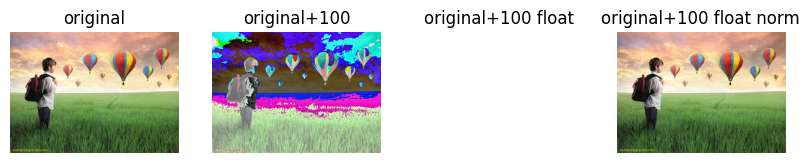

In [3]:
filename = os.path.join(IMDIR,'ballons.jpg')
original  = io.imread(filename)


# control how large the images are shown on the screen
plt.rcParams['figure.figsize'] = [10, 5]

# Pipeline 1
wrongim = original + 100

# Pipeline 2
im = original
# floatim = im + 100
floatim=im.astype(float)+100

# Pipeline 3
floatimnorm = (floatim - floatim.min())/(floatim.max()-floatim.min())

# Display results
plt.subplot(1,4,1)
plt.imshow(original)
plt.title('original')
ax = plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(wrongim)
plt.title('original+100')
ax = plt.axis('off')

plt.subplot(1,4,3)
plt.title('original+100 float')
plt.imshow(floatim)
ax = plt.axis('off')

plt.subplot(1,4,4)
plt.title('original+100 float norm')
plt.imshow(floatimnorm)
ax = plt.axis('off')
plt.show()



## 2. Color images

**a)** Create your own function to convert the image above to grayscale (formula from lecture) compare it to a simple unweighted average.

**b)** Create a function that mixes the green and red colors to simulate colorblindness

Apply the functions and show the results

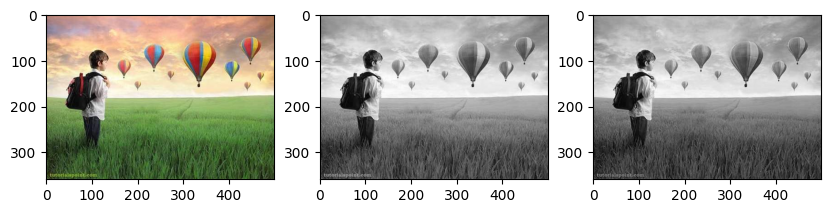

In [ ]:
def color_to_rgb(im, weights=[0.3086,0.6094,0.0820]):
    red_im=im[:,:,0]
    green_im=im[:,:,1]
    blue_im=im[:,:,2]
    
    L_I=weights[0]*red_im+weights[1]*green_im+weights[2]*blue_im
    return L_I

im_gray = color_to_rgb(original)
im_gray_avg = color_to_rgb(original, weights=[0.33,0.33,0.33])

plt.subplot(1,3,1)
plt.imshow(original)
plt.subplot(1,3,2)
plt.imshow(im_gray, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(im_gray_avg, cmap='gray')
plt.show()

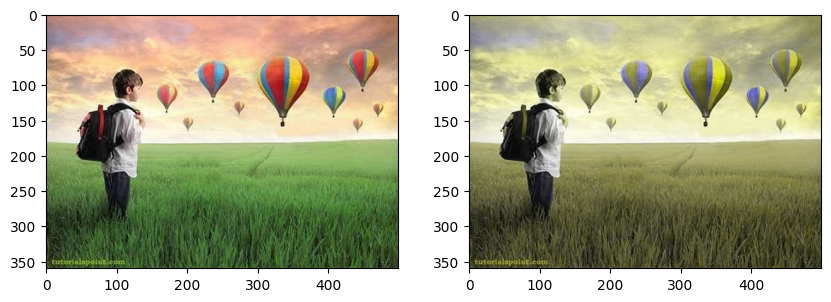

In [ ]:
def color_to_colorblind(im):
    im_norm=im.astype(float)/255
    new_img=np.zeros_like(im_norm)
    red_im=im_norm[:,:,0]
    green_im=im_norm[:,:,1]
    blue_im=im_norm[:,:,2]
    mean_rg=(red_im+green_im)/2
    new_img[:,:,0]=mean_rg
    new_img[:,:,1]=mean_rg
    new_img[:,:,2]=blue_im
    return new_img

img=color_to_colorblind(original)
plt.subplot(1,2,1)
plt.imshow(original)
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

## 2. Global Measures


**a)** Create a function that given an image, returns a DICTIONARY with the following GLOBAL measurements:
- min and max intensities (im.min(),im.max())
- image size (im.shape)
- image type (im.dtype)
- luminance (equation from lecture)
- contrast (equation from lecture)
- SNR (equation from lecture)

**b)** Create a function to compute and visualize the histogram of an image

*Hint:* You can use ``np.histogram`` or implement your own function. In the first case, when ploting the histogram with ``plt.plot`` use the following lines to compute the bin centers from the bin limits so that the dimensions of the histogram and the bins match.
```python
    hist, bin_limits = np.histogram(input_image, bins=256)
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
```

**c)** Print the global measures from **a)** and compute the histogram from **b)** for the "einstein.png" image read in grayscale. Display the image and its histogram.

**d)** Use the provided ``shuffle`` function and recompute the measurementss, what would be the effect on the previous measurements?

**e)** Create a function to compute each the following metrics given a noisy and a reference image:
- the MSE -> implement own
- the PSNR -> implement own
- the SSIM -> for the ssim use directly scikit ``structural_similarity``

Make sure to convert the back image to the [0, 255] range before the measurements, to get standard expected values.

🔥Compare your implementation with existing scikit implementation.

**f)**  Use the provided ``random_noise`` example to add different types and amounts of noise to the image.

- Analyse the effect of noise on the global measures and histogram from **a)** and **b)**.  Change the mean and the variance of different types of noise.

🔥Discuss your observations.

- Analyse the effect of noise on the reference based metrics from **e)**. Change the mean and the variance of different types of noise.

🔥Discuss your observations.

In [6]:
# a) and b)
def image_histogram(input_image, plot_me=True):
    hist, bin_limits = np.histogram(input_image, bins=256)
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
    return bin_centers,hist

def global_measures(input_image, display=True):
    properties = {}
    properties['shape'] =input_image.shape
    properties['min'] = input_image.min()
    properties['max'] = input_image.max()
    properties['luminance']=input_image.mean()
    properties['contrast']=input_image.std()
    properties['type'] = input_image.dtype
    properties['snr'] = 20*(np.log10(input_image.mean()/input_image.std()))
    properties['histo'] = image_histogram(input_image)

    if display:
      for name,val in properties.items():
        if name != 'histo':
          print(name,'-->',val)
    return properties



shape --> (256, 256)
min --> 0.0
max --> 255.0
luminance --> 102.8033447265625
contrast --> 41.65809713229708
type --> float64
snr --> 7.84615632954702


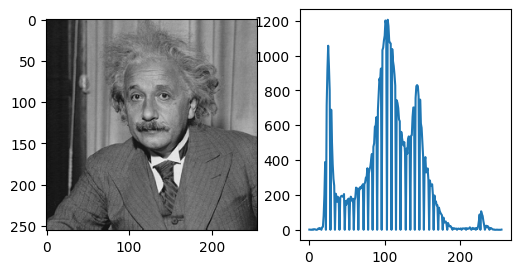

In [9]:
# c) apply global measures and histogram to an image
properties = global_measures(im_ref,display=True)
bins_ref,histo_ref = image_histogram(im_ref)

#Plot image and histogram
plt.rcParams['figure.figsize'] = [6, 3]
plt.subplot(1,2,1),plt.imshow(im_ref,cmap='gray')
plt.subplot(1,2,2),plt.plot(bins_ref,histo_ref)
plt.show()

shape --> (256, 256)
min --> 0.0
max --> 255.0
luminance --> 102.8033447265625
contrast --> 41.65809713229708
type --> float64
snr --> 7.84615632954702


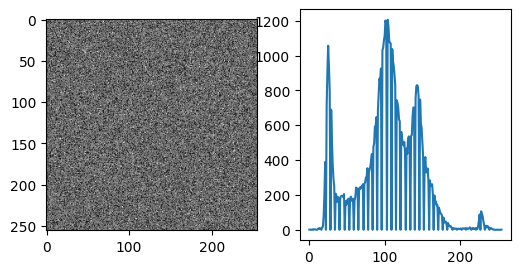

In [10]:
#d) shuffle the image and remeasure
def shuffle_image(im_gray):
    im_shuffle = im_gray.ravel().copy()
    np.random.shuffle(im_shuffle)
    im_shuffle=np.reshape(im_shuffle, im_gray.shape)
    return im_shuffle


im_shuffled = shuffle_image(im_ref)

# FILL WITH YOUR CODE
new_measures=global_measures(im_shuffled)
bins_shuf,histo_shuf = image_histogram(im_shuffled)
#plotting
plt.rcParams['figure.figsize'] = [6, 3]
plt.subplot(1,2,1),plt.imshow(im_shuffled,cmap='gray')
plt.subplot(1,2,2),plt.plot(bins_shuf,histo_shuf)
plt.show()
# utill.plot_two_imgs(im_ref, im)





In [11]:

def mse(im, ref_im):
    #### NEEDS FLOATS TO COMPUTE THE DIFFERENCE
    img = 255*im/im.max()
    ref_img=255*ref_im/im.max()
    sqr_err=np.sum((ref_img.astype(float)-img.astype(float))**2)
    total_pixel=img.size
    return sqr_err/total_pixel

def psnr(im, ref_im, data_range = 255): #expects image in [0,255] range
    img = data_range*im/im.max()
    ref_img=data_range*ref_im/im.max()
    sqr_err=np.sum((ref_img.astype(float)-img.astype(float))**2)
    total_pixel=img.size
    ms_err=sqr_err/total_pixel
    peak_err=10*(np.log10((im.max())**2/ms_err))
    return peak_err



shape --> (256, 256)
min --> 0.0
max --> 255.0
luminance --> 102.8033447265625
contrast --> 41.65809713229708
type --> float64
snr --> 7.84615632954702
shape --> (256, 256)
min --> 0.0
max --> 255.0
luminance --> 102.90928240810646
contrast --> 45.223865604911126
type --> float64
snr --> 7.141737360474458


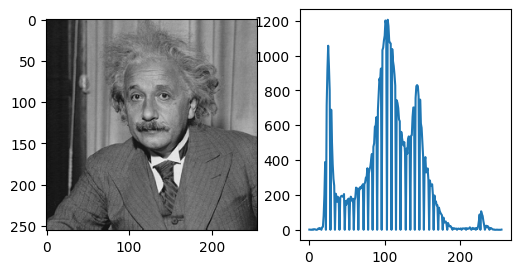

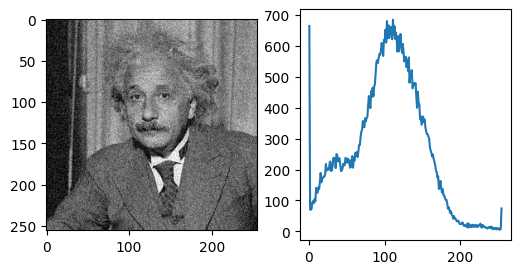

mse: 320.642, psnr: 23.071 dB
scikit mse: 320.642, psnr: 23.071 dB ssim: 0.486


In [12]:
#e) add noise and analyse global measures and reference-based quality metrics
import numpy.random
from skimage.util import random_noise
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

im_ref = io.imread(os.path.join(IMDIR,'einstein.png'),as_gray=True)

# Add noise
# DOCUMENTATION https://scikit-image.org/docs/stable/api/skimage.util.html
im_noisy = random_noise(im_ref, mode='gaussian', mean=0, var = 0.005)
#im_speckle = random_noise(im_ref, mode='speckle', mean=0, var = 0.05)
#im_salt_and_pepper = random_noise(image, mode='s&p', amount=0.05, proportion = 0.5)

#Put both reference and noisy image back to standards range for psnr
im_ref = 255*im_ref
im_noisy = 255*im_noisy

# FILL WITH YOUR CODE

# Global measures from original and noisy image
o_measures=global_measures(im_ref)
n_measures=global_measures(im_noisy)

# Plot original and noisy images and their histograms
bins_o,histo_o = image_histogram(im_ref)
#plotting
plt.rcParams['figure.figsize'] = [6, 3]
plt.subplot(1,2,1),plt.imshow(im_ref,cmap='gray')
plt.subplot(1,2,2),plt.plot(bins_o,histo_o)
plt.show()

bins_n,histo_n = image_histogram(im_noisy)
#plotting
plt.rcParams['figure.figsize'] = [6, 3]
plt.subplot(1,2,1),plt.imshow(im_noisy,cmap='gray')
plt.subplot(1,2,2),plt.plot(bins_n,histo_n)
plt.show()


# compute and display mse, psnr, and ssim,
# check values with scikit functions

my_mse = mse(im_ref,im_noisy)
my_psnr =psnr(im_ref,im_noisy)

sk_mse = sk.metrics.mean_squared_error(im_ref,im_noisy)
sk_psnr =sk.metrics.peak_signal_noise_ratio(im_ref,im_noisy,data_range=255)
sk_ssim = sk.metrics.structural_similarity(im_ref,im_noisy,data_range=255)

print('mse: {0:.3f}, psnr: {1:.3f} dB'.format(my_mse,my_psnr))
print('scikit mse: {0:.3f}, psnr: {1:.3f} dB ssim: {2:.3f}'.format(sk_mse, sk_psnr,sk_ssim))


## 2. Intensity transformations, transfer functions and morphological operations

**(a)** Create three functions implementing the following intensity transformations
- inversion
- a thresholding function based on a parameter k
- a contrast_stretching function with parameters t and w

**(b)** Show the transfer function of the above intensity transformations.

**(c)** Apply the functions above to the ``page`` image to segment the text from the background.

**(d)** Apply a morphological operation to enlarge the segmented text (only for ATRIM)


In [31]:
def invert (input_im):
    im_ref = input_im/input_im.max()
    im_inv=sk.util.invert(im_ref, signed_float=False)
    return im_inv

def threshold(input_im, th=0.5):
    im_ref = input_im/input_im.max()
    row, col = im_ref.shape
    for i in range(row):
        for j in range(col):
            if im_ref[i][j]> th:
                im_ref[i][j]=1
            else:
                im_ref[i][j]=0          
    return im_ref  

def contrast_stretch(img,t=0.3,w=0.05):
    img = img/img.max()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            a= np.exp(-(img[i][j]-t)/w)
            s=1/(1+a)
            img[i][j]=s
    return img


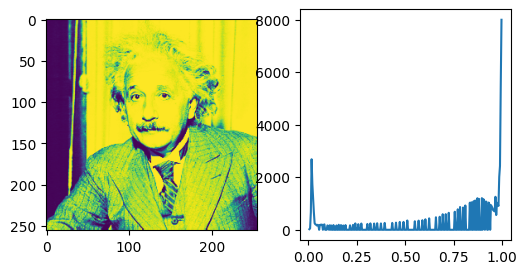

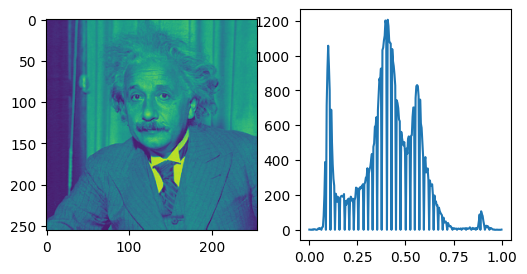

In [32]:
im = io.imread(os.path.join(IMDIR,'einstein.png'),as_gray=True)
im_cont=contrast_stretch(im.copy())
bins_im,histo_im = image_histogram(im.copy())
bins_c,histo_c = image_histogram(im_cont)
plt.rcParams['figure.figsize'] = [6, 3]
plt.subplot(1,2,1),plt.imshow(im_cont)
plt.subplot(1,2,2),plt.plot(bins_c,histo_c)
plt.show()
plt.subplot(1,2,1),plt.imshow(im.copy())
plt.subplot(1,2,2),plt.plot(bins_im,histo_im)
plt.show()


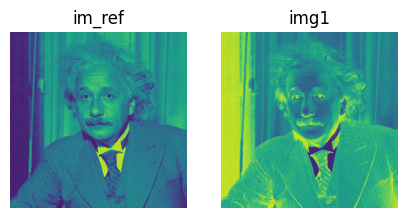

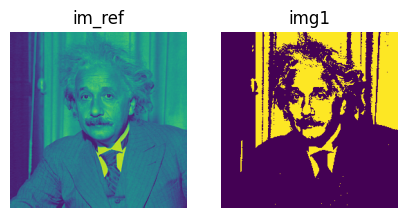

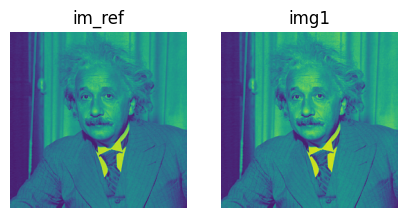

In [ ]:
# Apply each function and show the effect on the image
width=5
height=5
# plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure(figsize=(width, height))
inv_im=invert(im.copy())
utill.plot_two_imgs(im.copy(),inv_im.copy())

fig=plt.figure(figsize=(width, height))
thre_im=threshold(im.copy())
utill.plot_two_imgs(im,thre_im)
fig=plt.figure(figsize=(width, height))
cont_im=contrast_stretch(im.copy())
utill.plot_two_imgs(im,cont_im)

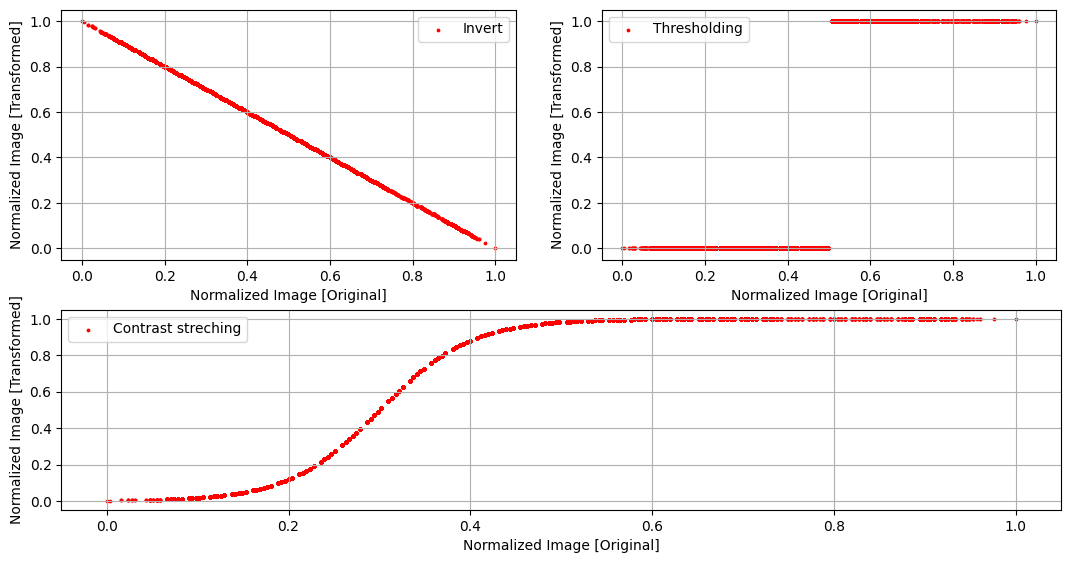

In [87]:
fig=plt.figure(figsize=(10,5))
x, y, h, w = 0, 0, 1, 1
ax1=fig.add_axes([0,0,1,h/2.5])
ax2=fig.add_axes([0,0+h/2,w/2.2,h/2])
ax3=fig.add_axes([0+w/1.85,0+h/2,w/2.2,h/2])
ax1.scatter(im.flatten(),contrast_stretch(im).flatten(), label='Contrast streching', s=3,c='r')
ax2.scatter(im.flatten(),invert(im).flatten(), label='Invert', s=3,c='r')
ax3.scatter(im.flatten(),threshold(im).flatten(), label='Thresholding', s=3,c='r')

for ax in [ax1, ax2, ax3]:
    ax.grid()
    ax.set_xlabel("Normalized Image [Original]")
    ax.set_ylabel("Normalized Image [Transformed]")
    ax.legend()
    